In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)


solvers.options['show_progress'] = False

In [16]:

n_assets = 4


n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)
return_vec

array([[-0.27974977,  0.74295709,  1.28029334, ...,  0.26215012,
        -1.64219097,  0.81005315],
       [-0.06972585, -0.90149564, -0.32388435, ...,  0.21308689,
        -0.49097031, -1.0815104 ],
       [ 0.00480111, -0.36079657,  0.01201943, ..., -1.00225954,
         0.37978296,  1.05351144],
       [ 0.15687333, -0.80646414, -0.56011063, ..., -0.28124248,
        -0.72765971, -0.55100223]])

Text(0, 0.5, 'returns')

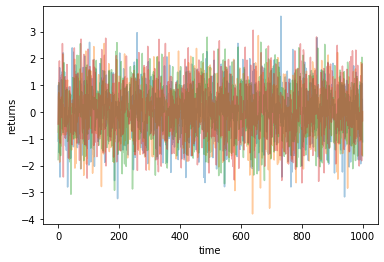

In [3]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [17]:
def rand_weights(n):
    
    k = np.random.rand(n)
    return k / sum(k)

rand_weights(n_assets)

array([0.41239299, 0.05406612, 0.13470879, 0.39883209])

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

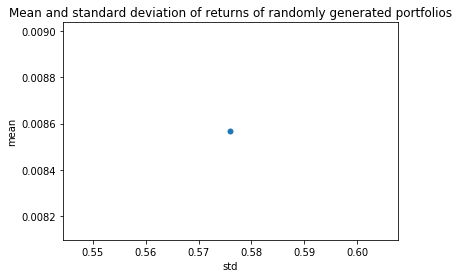

In [32]:
def random_portfolio(returns):
    

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    
    if sigma < 2:
        return random_portfolio(returns)
    return mu, sigma

plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')#if you have an array, there is something wrong when you generate just one point 


In [33]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
   
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    
    G = -opt.matrix(np.eye(n))   
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
   
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
   
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
   
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)



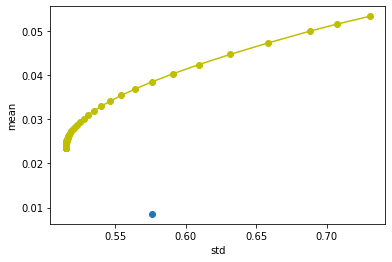

In [34]:
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')